## Importations

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import sys
sys.path.append('../')

## ML
from scripts.machine_learning_utils import *
from scripts.manage_data import *

## data
import seaborn as sns
import pandas as pd

from scipy.stats import linregress

# Parameters for publication figures
rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)



## Get data

##### Get data to compare Lewis acidity metrics

In [3]:
df_all_data = pd.read_excel('../tables/data/all_available_metrics_various_boron_LA.xlsx')

##### Get data for the 4 studied molecular structures

In [4]:
df_total = pd.read_csv('../tables/data/df_total.csv')

## Plots

#### ONO dataset

C:\Users\Juliette\AppData\Local\Temp\ipykernel_7104\1052285339.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_total.dropna(subset='HIA')[df_total.group == 'ONO'].sort_values("FIA")


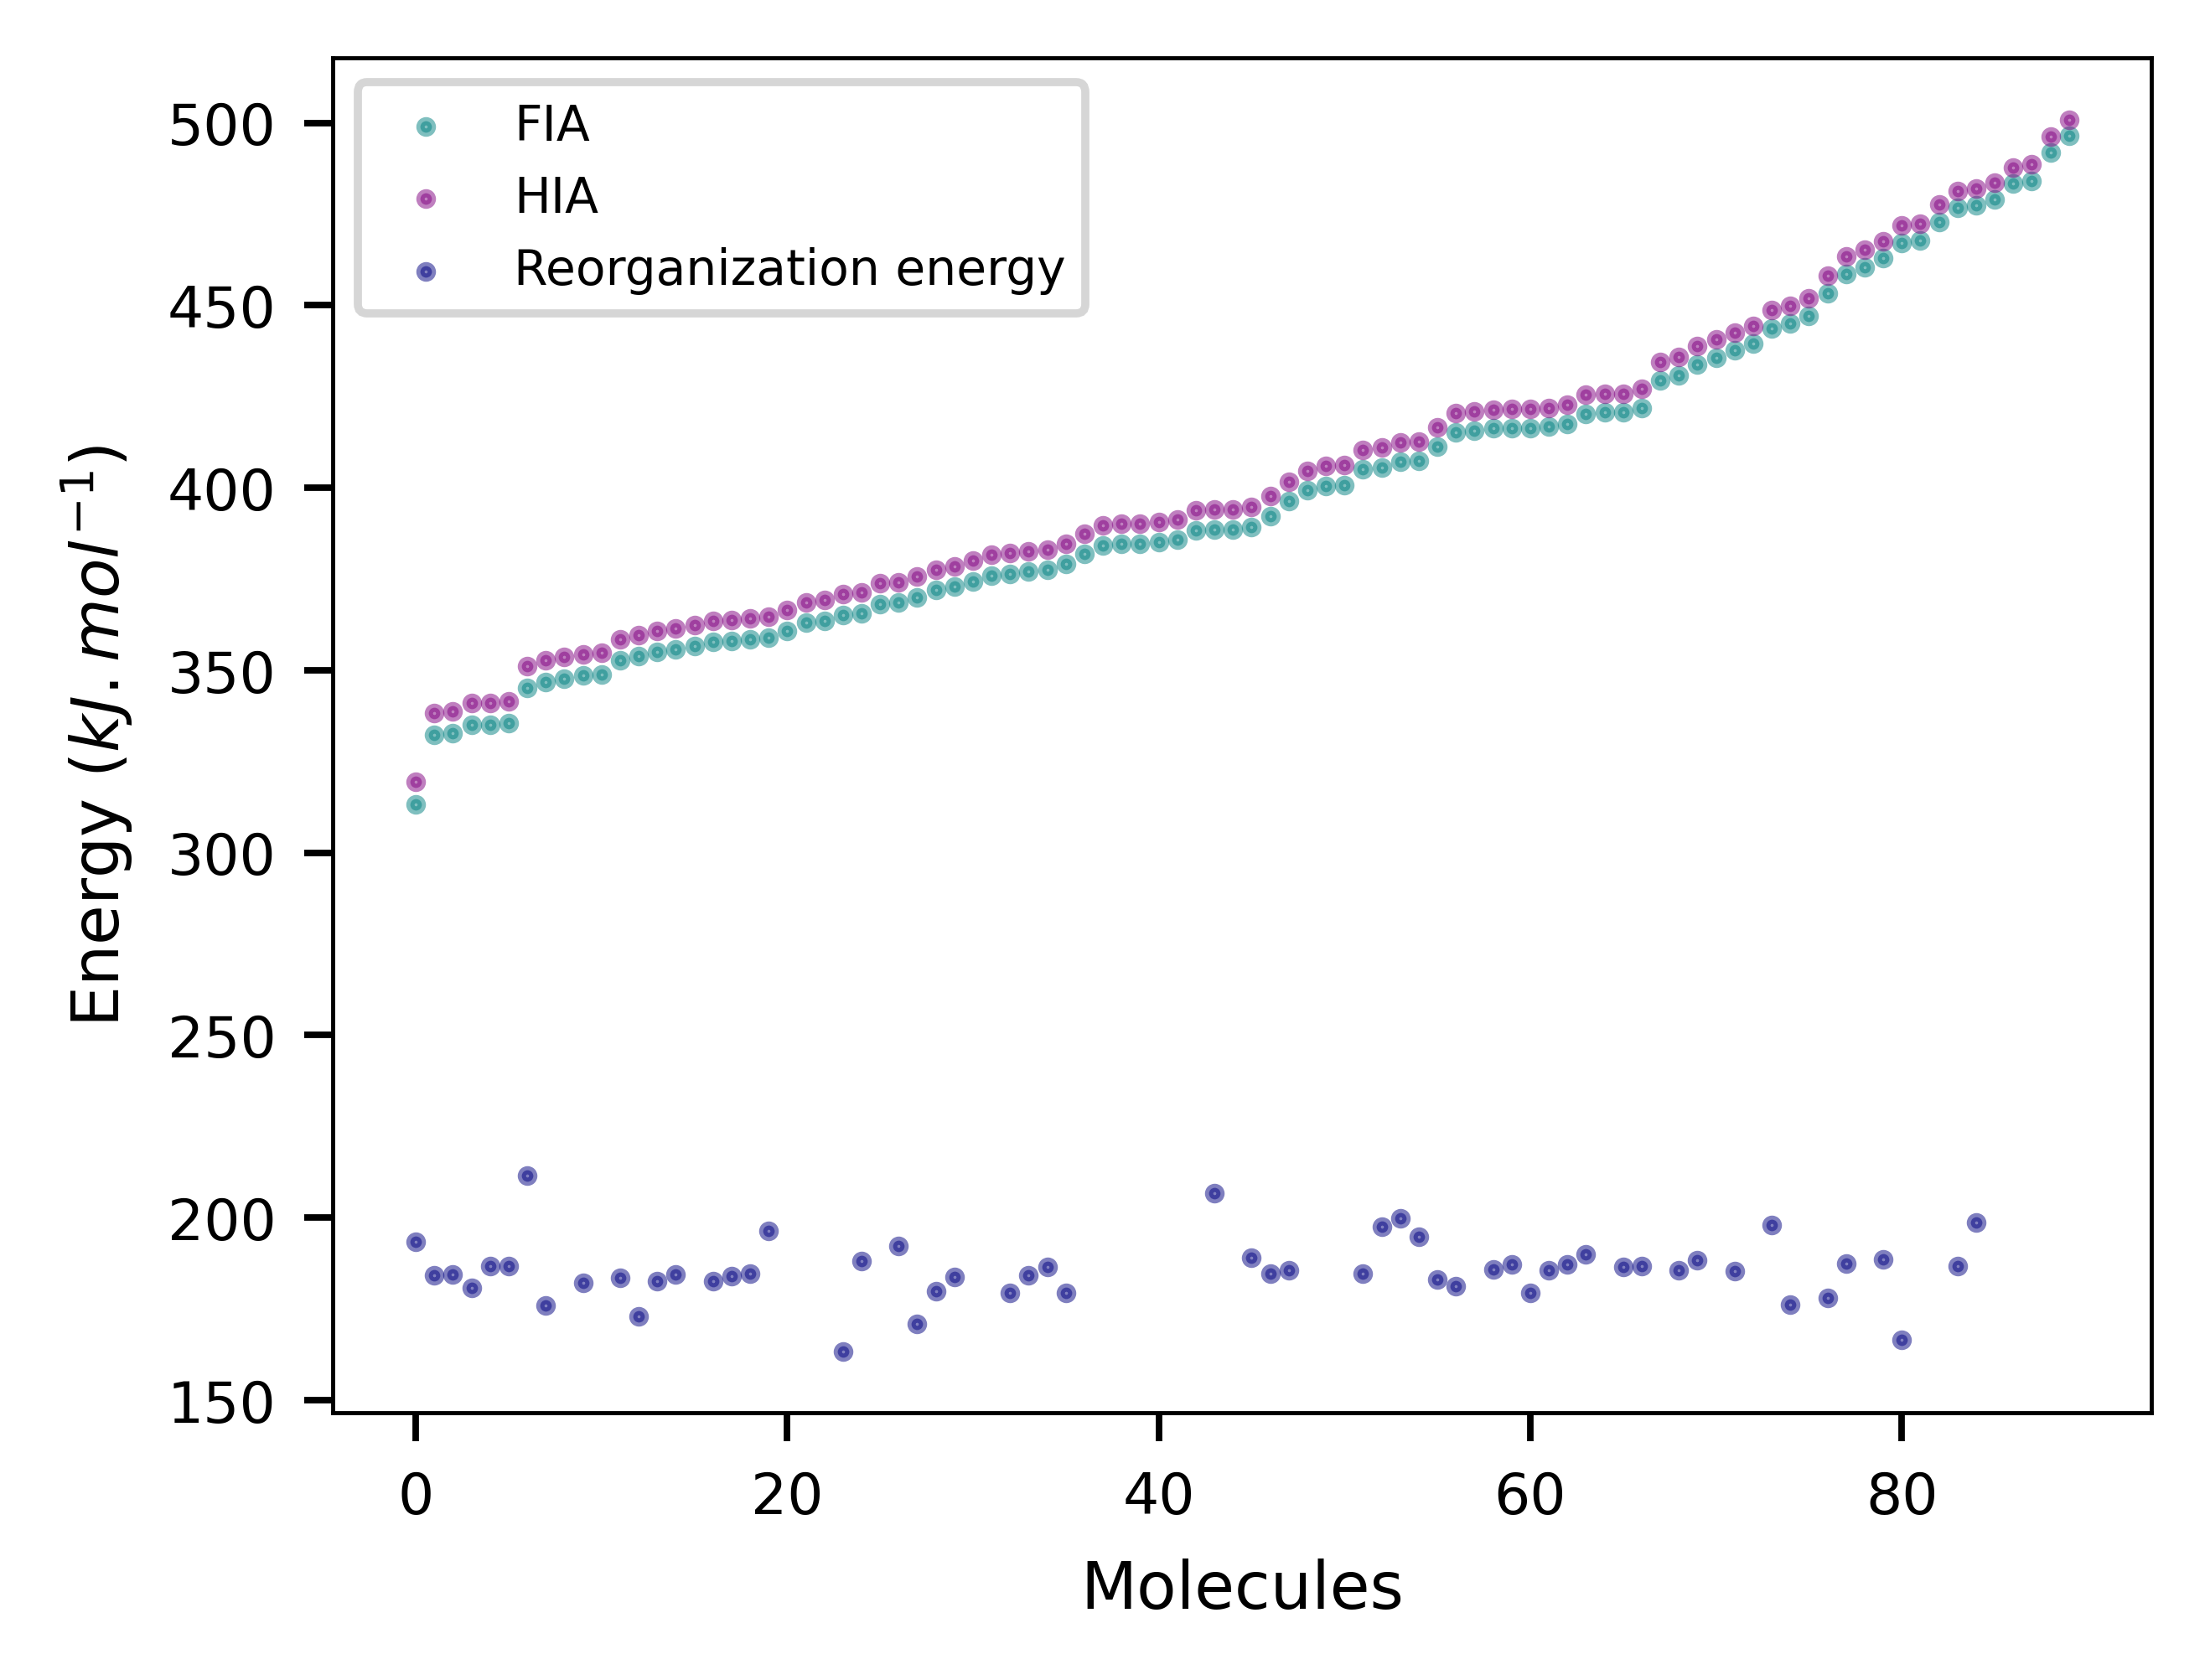

In [25]:
df = df_total.dropna(subset='HIA')[df_total.group == 'ONO'].sort_values("FIA")

fig, ax1 = plt.subplots(figsize=(4, 3))

x = range(len(df))

y1 = df['FIA']
y2 = df['HIA']
y3 = df['reorg_nrj']



ax1.scatter(x, y1, color='teal', label='FIA', s=2, alpha = 0.5)

ax1.scatter(x, y2, color = 'purple', label='HIA', s=2, alpha = 0.5)

ax1.scatter(x, y3, color = 'navy', label='Reorganization energy', s=2, alpha = 0.5)

ax1.set_xlabel('Molecules')
ax1.set_ylabel('Energy ($kJ.mol^{-1}$)', color='black')
ax1.tick_params('y', colors='black')

ax1.legend()

#plt.title('ONO database')
plt.show()

fig.savefig(f'../results/Lewis_acidity_scale/FIA_HIA_reorg_nrj_ONO.png', facecolor = 'white', format = 'png', transparent = True, bbox_inches='tight')

### Database of various Lewis acids with GB NMR data

In [10]:
df_pairplot = df_all_data[['average Ddelta',  'FIA',
       'reorg_nrj', 'GEI']].rename(columns={'average Ddelta':'GB $\Delta\delta$ ($ppm$)', 'FIA' : 'FIA ($kJ.mol^{-1}$) ', 'reorg_nrj' : 'Reorg. energy ($kJ.mol^{-1}$)', 'GEI' : 'GEI ($eV$)'})

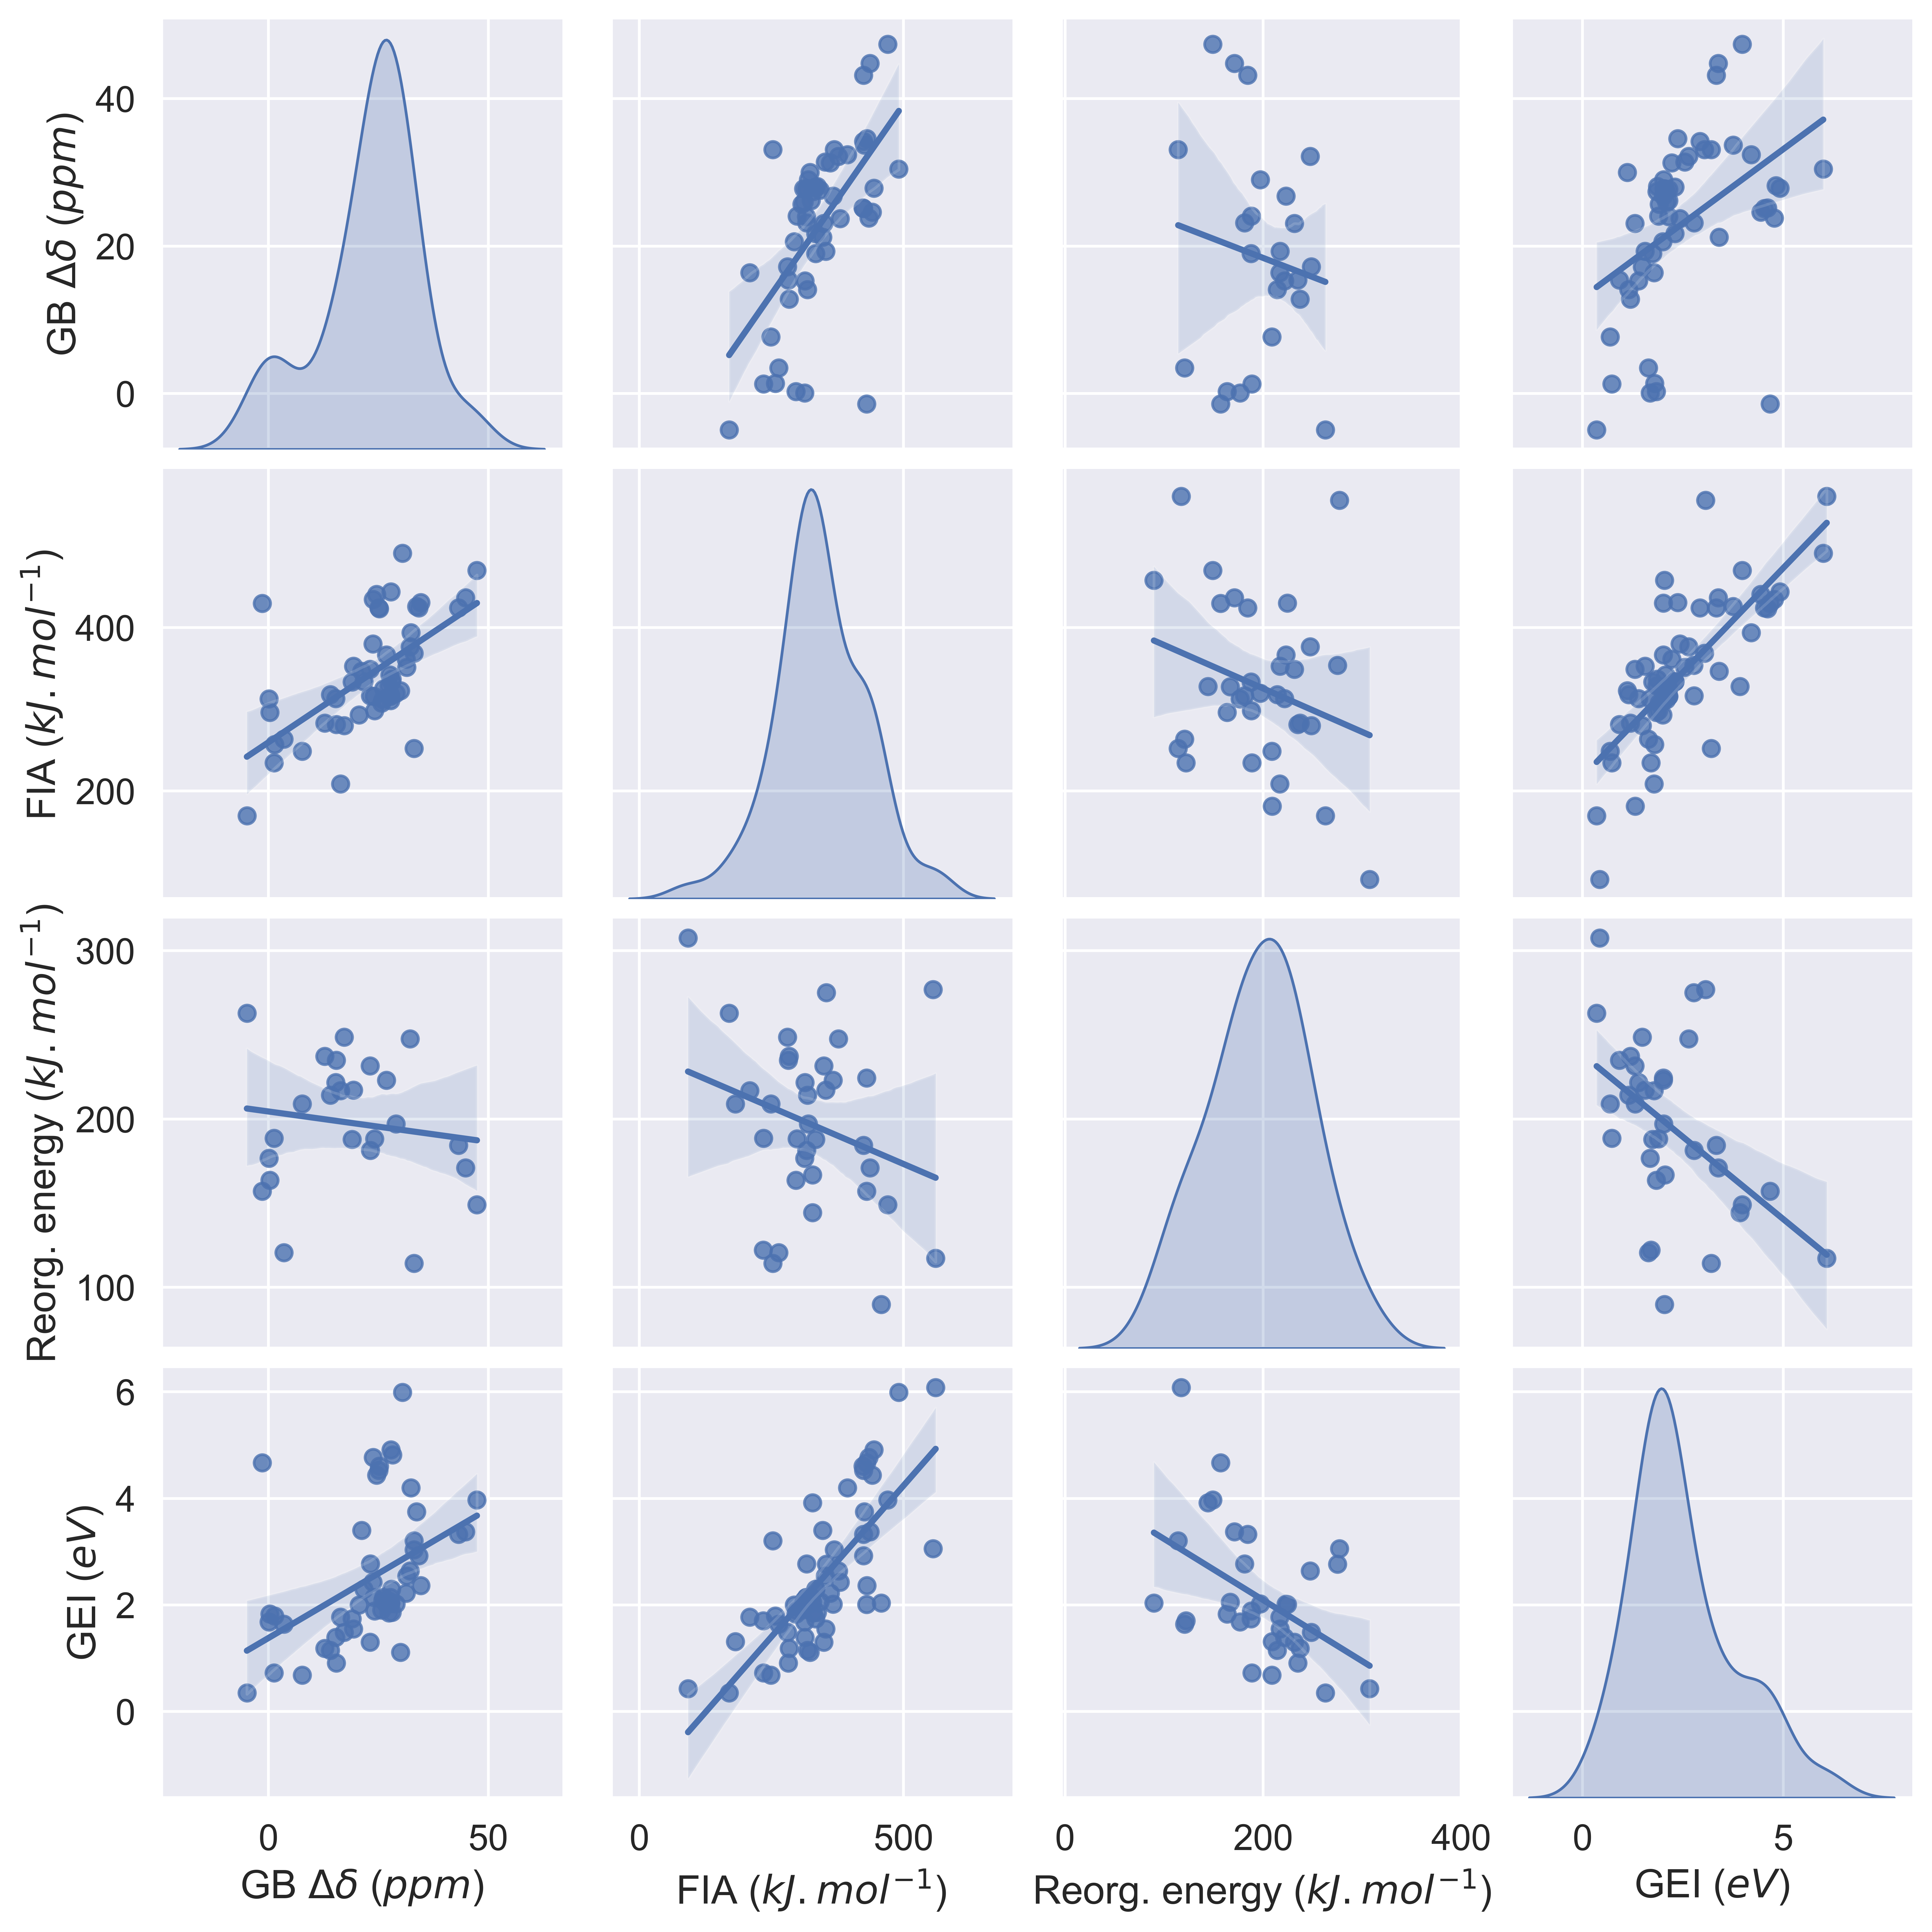

In [11]:

sns.set(rc={'figure.figsize':(7,7)}, font_scale = 1.2)
pairplot = sns.pairplot(df_pairplot , kind="reg", diag_kind="kde")


In [12]:
pairplot.savefig('../results/Lewis_acidity_scale/pairplot_LA.png', format = "png", transparent= False, bbox_inches='tight')

In [15]:
df_all_data[['average Ddelta', 'FIA', 'HIA', "reorg_nrj", 'GEI']].corr().to_excel('../results/Lewis_acidity_scale/correlation_matrix_lewis_acidity.xlsx')

#### Summary plot

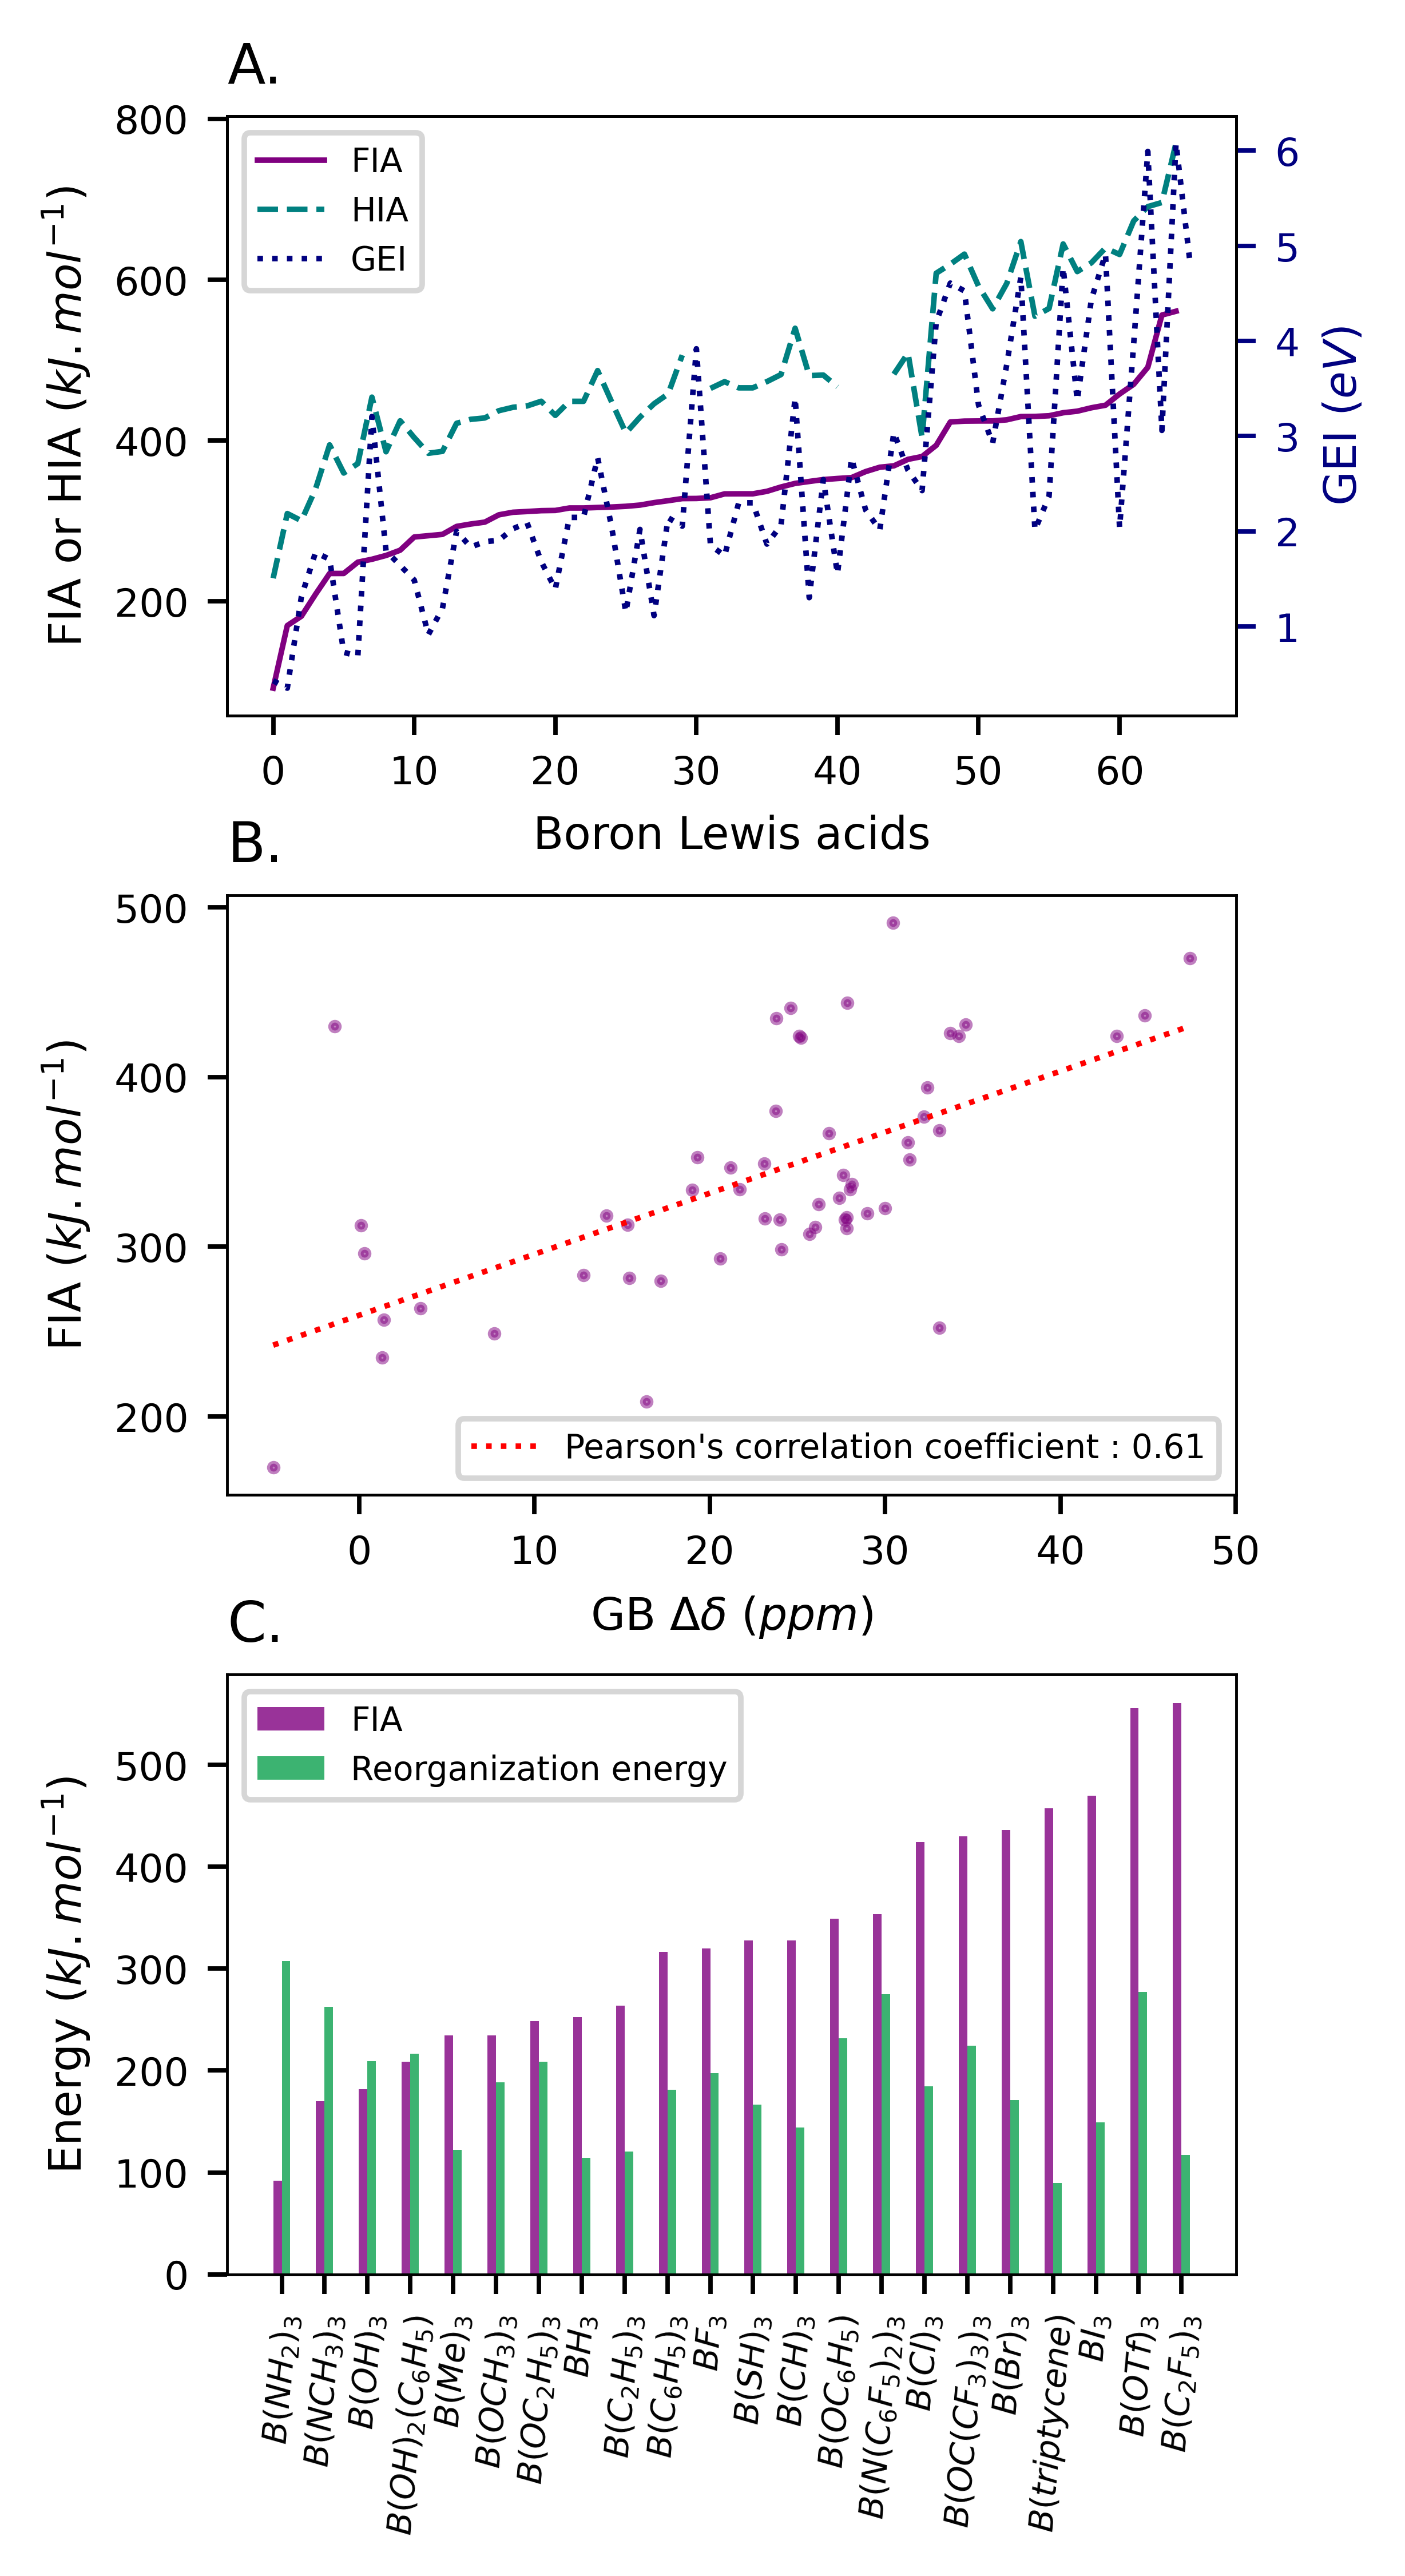

In [9]:
fig = plt.figure(figsize=(3.25, 7))
gs = fig.add_gridspec(3, 1)

## 1st subgraph ##

df = df_all_data.sort_values("FIA")
ax1 = fig.add_subplot(gs[0])

x = range(len(df))


ax1.plot(x, df['FIA'], 'purple', linestyle = 'solid', label='FIA')
ax1.plot(x, df['HIA'], "teal", linestyle = 'dashed' , label='HIA')

ax1.set_xlabel('Boron Lewis acids')
ax1.set_ylabel('FIA or HIA ($kJ.mol^{-1}$)', color='black')
ax1.tick_params('y', colors='black')

ax1_3 = ax1.twinx()

ax1_3.plot(x, df['GEI'], 'navy', linestyle = "dotted", label='GEI')
ax1_3.set_ylabel('GEI ($eV$)', color='navy')
ax1_3.tick_params('y', colors='navy')
ax1_3.spines['right'].set_position(('outward', 0))


lines, labels = ax1.get_legend_handles_labels()

lines3, labels3 = ax1_3.get_legend_handles_labels()

ax1.legend(lines + lines3 , labels + labels3 , loc='upper left')
ax1.set_title("A.", loc='left', fontsize =10)

## 2nd subgraph ##

df = df_all_data.dropna(subset = 'average Ddelta').sort_values("average Ddelta")
df = df.dropna(subset = 'FIA')

ax2 = fig.add_subplot(gs[1])
scatter = ax2.scatter(df["average Ddelta"], df['FIA'], color = "purple", s = 2, alpha = 0.5)
ax2.set_ylabel('FIA ($kJ.mol^{-1}$)', color='black')
ax2.set_xlabel('GB $\Delta\delta$ $(ppm)$')


slope, intercept, r_value, p_value, std_err = linregress(df["average Ddelta"], df['FIA'])


x_vals = np.linspace(df["average Ddelta"].min(), df["average Ddelta"].max(), 100)
y_vals = slope * x_vals + intercept
regr = ax2.plot(x_vals, y_vals, linestyle = 'dotted',color='red', label=f'Linear regression \n$R^2$={r_value**2:.2f}')


legend_text = f"Pearson's correlation coefficient : {r_value:.2f}"
ax2.legend(regr, [legend_text], loc='lower right')
ax2.set_title("B.", loc='left', fontsize =10)


## 3rd subgraph ##

ax3 = fig.add_subplot(gs[2])

df = df_all_data.dropna(subset = 'name')
df = df.sort_values('FIA')

FIA = df.FIA

reorg_nrj = df['reorg_nrj']
names = df.name

num = list(range(len(names)))


width = 0.1

axis = lambda x : x - width * (1 - n)
n=0
ax3.bar(list(map(axis, num)), FIA, label = "FIA", color ='purple', width = 0.2, alpha =0.8)
n=2


ax3.bar(list(map(axis, num)), reorg_nrj, label = "Reorganization energy", color = 'mediumseagreen', width = 0.2)
    
ax3.set_xticks(num)
ax3.set_xticklabels(names, rotation = 85, fontsize = 6)


ax3.set_ylabel('Energy $(kJ.mol^{-1})$')

ax3.legend(loc='upper left')

ax3.set_title("C.", loc='left', fontsize =10)

plt.subplots_adjust(hspace=0.3)

#plt.tight_layout()

plt.show()

fig.savefig('../results/Lewis_acidity_scale/lewis_acidity_description.png', transparent= True, facecolor='white', bbox_inches='tight')




#### Various LA dataset (for which we don't necessarily have the NMR GB metric)

In [16]:
df_small_LA = pd.read_csv('../tables/data/table_smiles_FIA_HIA_reorg_nrj_small_boron_LA.csv')

In [24]:
df_small_LA["names"]= ['$BH_3$', '$BBr_3$', '$B(CH)_3$', '$B(triptycene)$', '$B(Me)_3$', '$BCl_3$','$BF_3$',
 '$B(C_2F_5)_3$', '$B(OC(CF_3)_3)_3$', '$B(C_6F_5)_3$', '$B(OC_6F_5)_3$', '$B(N(C_6F_5)_2)_3$', '$BI_3$', '$B(NH_2)_3$',
 '$B(OTf)_3$', '$B(OH)_3$', '$B(SH)_3$', '$B(Ph)_3$']

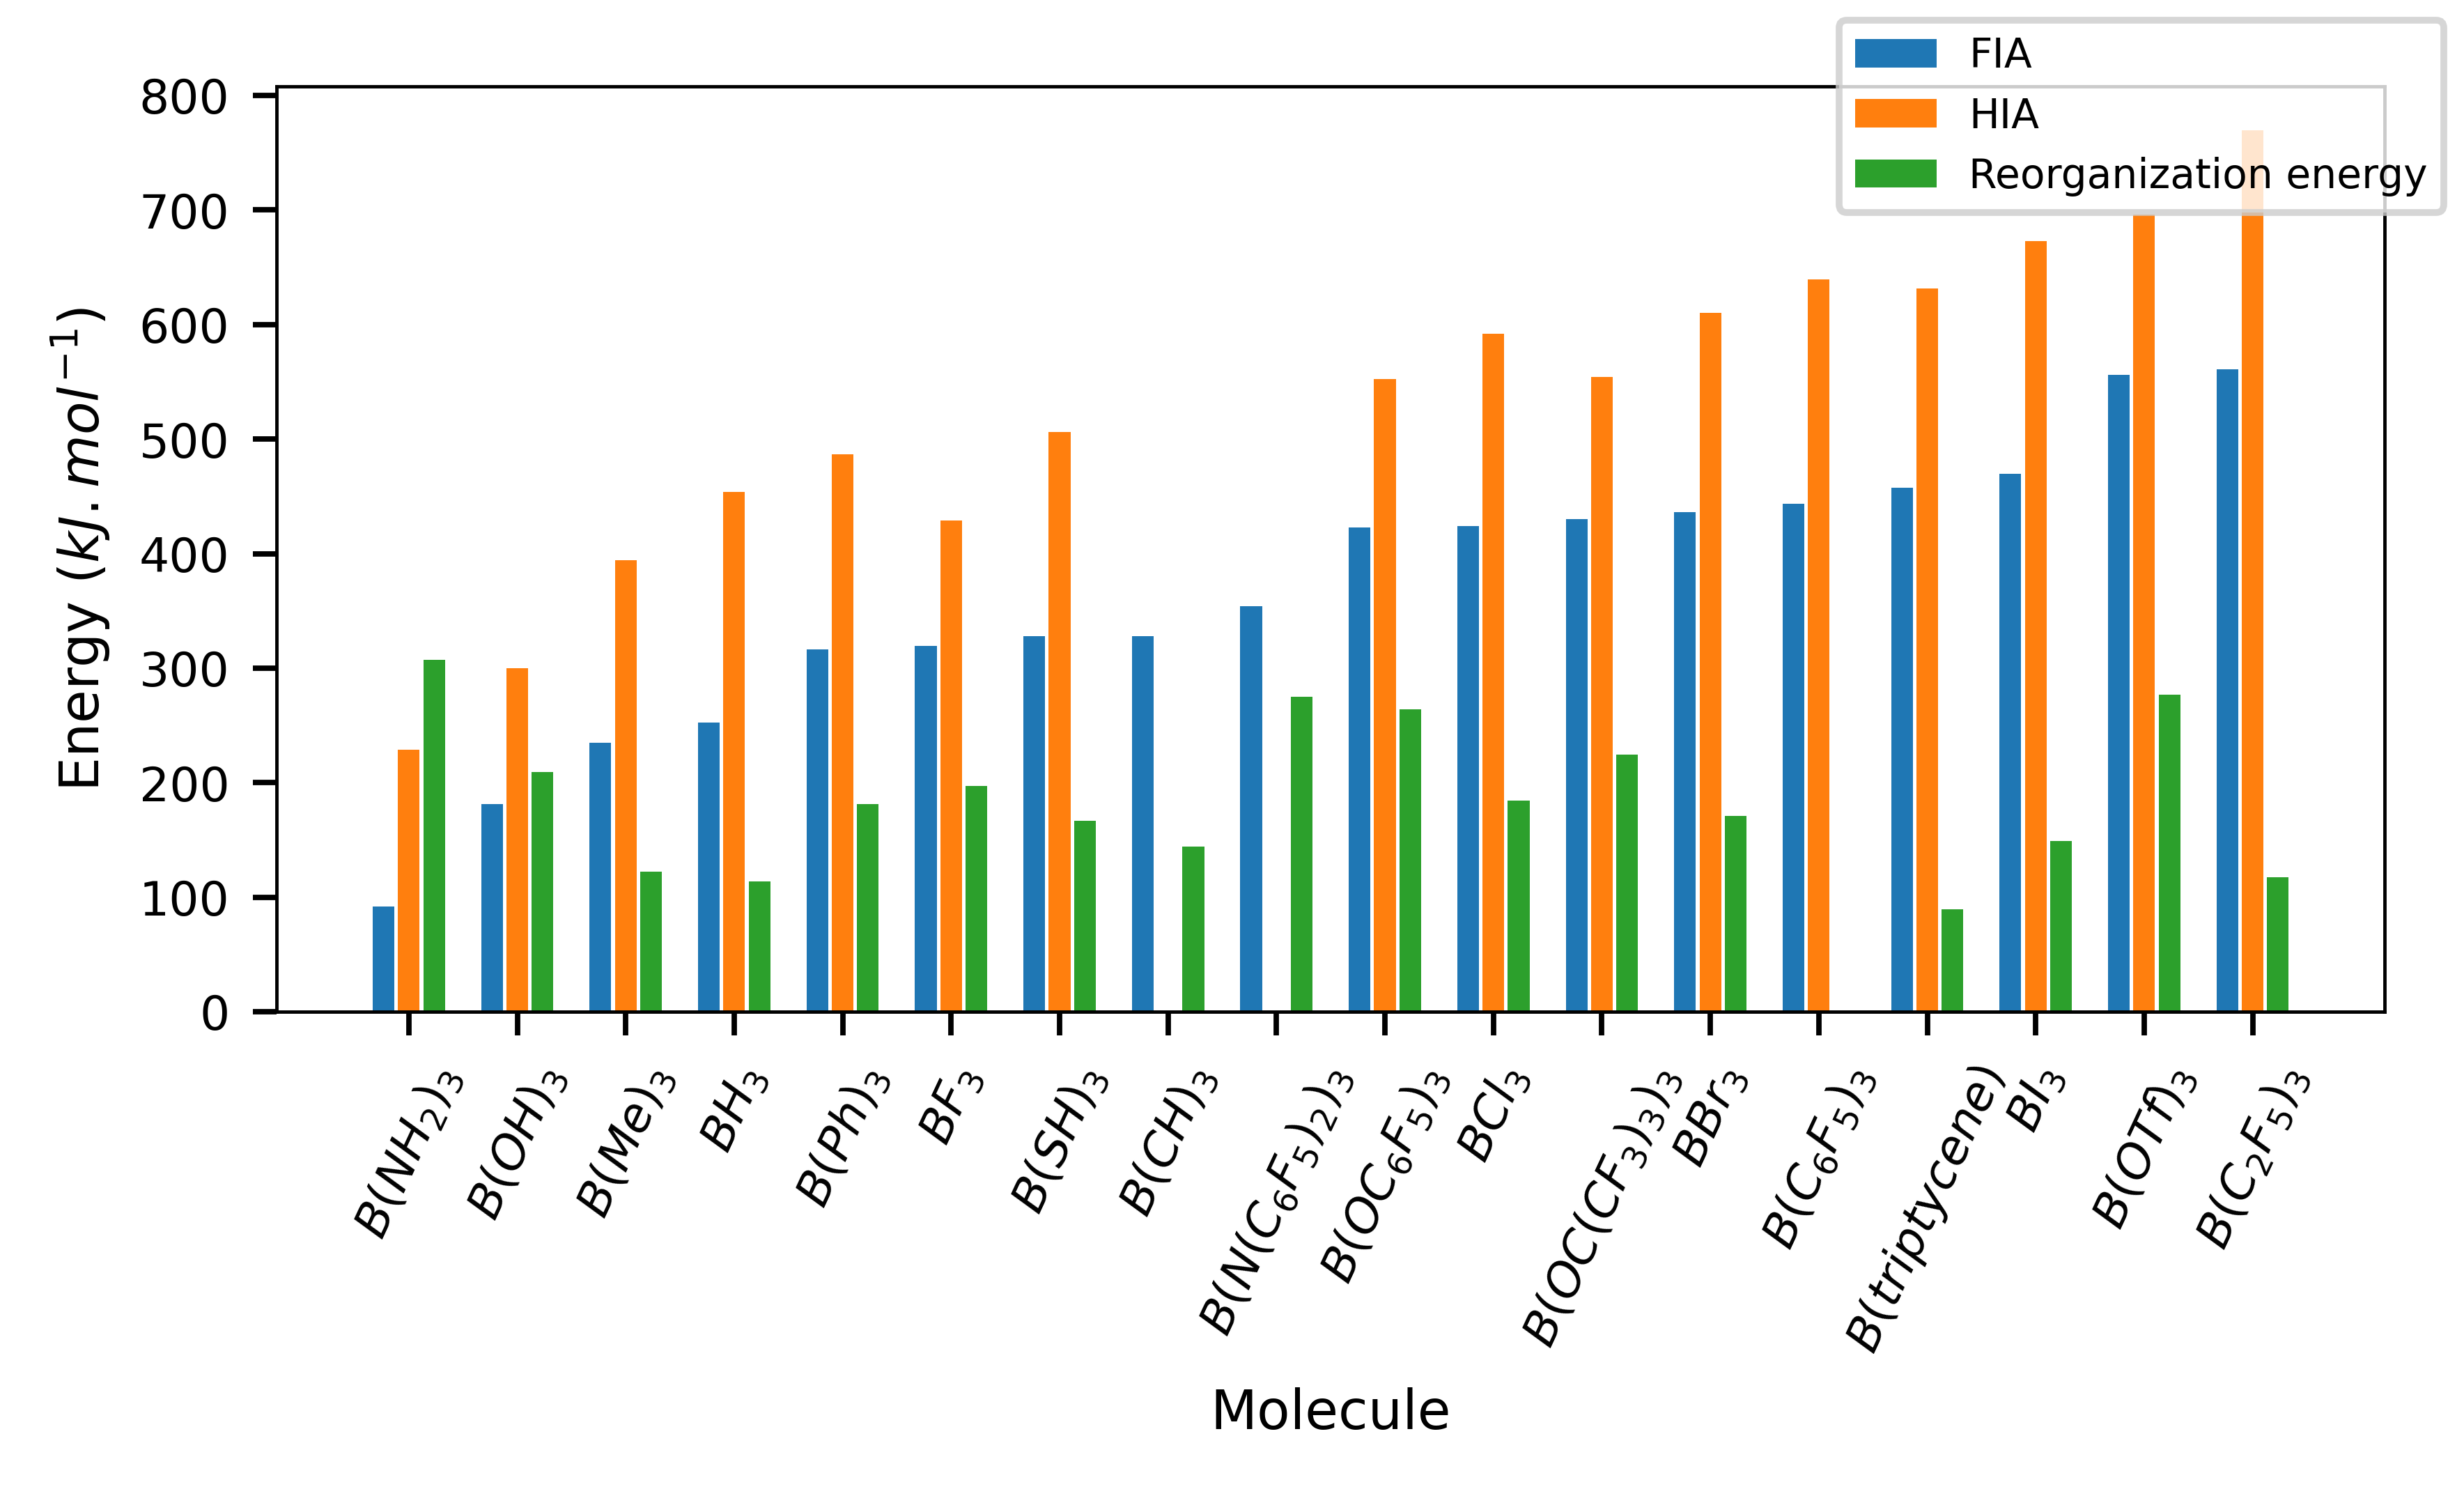

In [32]:
df = df_small_LA.sort_values("FIA")

FIA = df.FIA
HIA = df.HIA
reorg_nrj = df['reorg_nrj']
names = df.names


fig = plt.figure(figsize = (5,3))
ax =  fig.subplots()

num = list(range(len(names)))


width = 0.7/3

axis = lambda x : x - width * (1 - n)
n=0
ax.bar(list(map(axis, num)), FIA, label = "FIA", width = 0.2)
n=1
ax.bar(list(map(axis, num)), HIA, label = "HIA", width = 0.2)
n = 2 
ax.bar(list(map(axis, num)), reorg_nrj, label = "Reorganization energy", width = 0.2)
    
ax.set_xticks(num)
ax.set_xticklabels(names, rotation = 65)

ax.set_xlabel('Molecule')
ax.set_ylabel('Energy ($kJ.mol^{-1}$)')

fig.legend()
fig.tight_layout()


In [37]:
df_small_LA = df_small_LA.set_index('SMILES')

In [38]:
df_small_LA.to_csv("../tables/df_small_LA.csv")

As expected, boron triptycene has the lower reorganization energy